In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
bike_df = pd.read_csv('./Bikeshare.csv')

In [4]:
bike_df.head()

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9


In [40]:
lat_lon=bike_df[['Start Station Latitude','Start Station Longitude']]

In [43]:
lat_lon=lat_lon.drop_duplicates()

In [52]:
lat_lon.describe()

,Start Station Latitude,Start Station Longitude
count,51.000000,51.000000
mean,40.722391,-74.056281
std,0.013041,0.017047
min,40.692640,-74.096937
25%,40.714252,-74.067272
50%,40.721525,-74.050444
75%,40.728170,-74.043918
max,40.752559,-74.032108


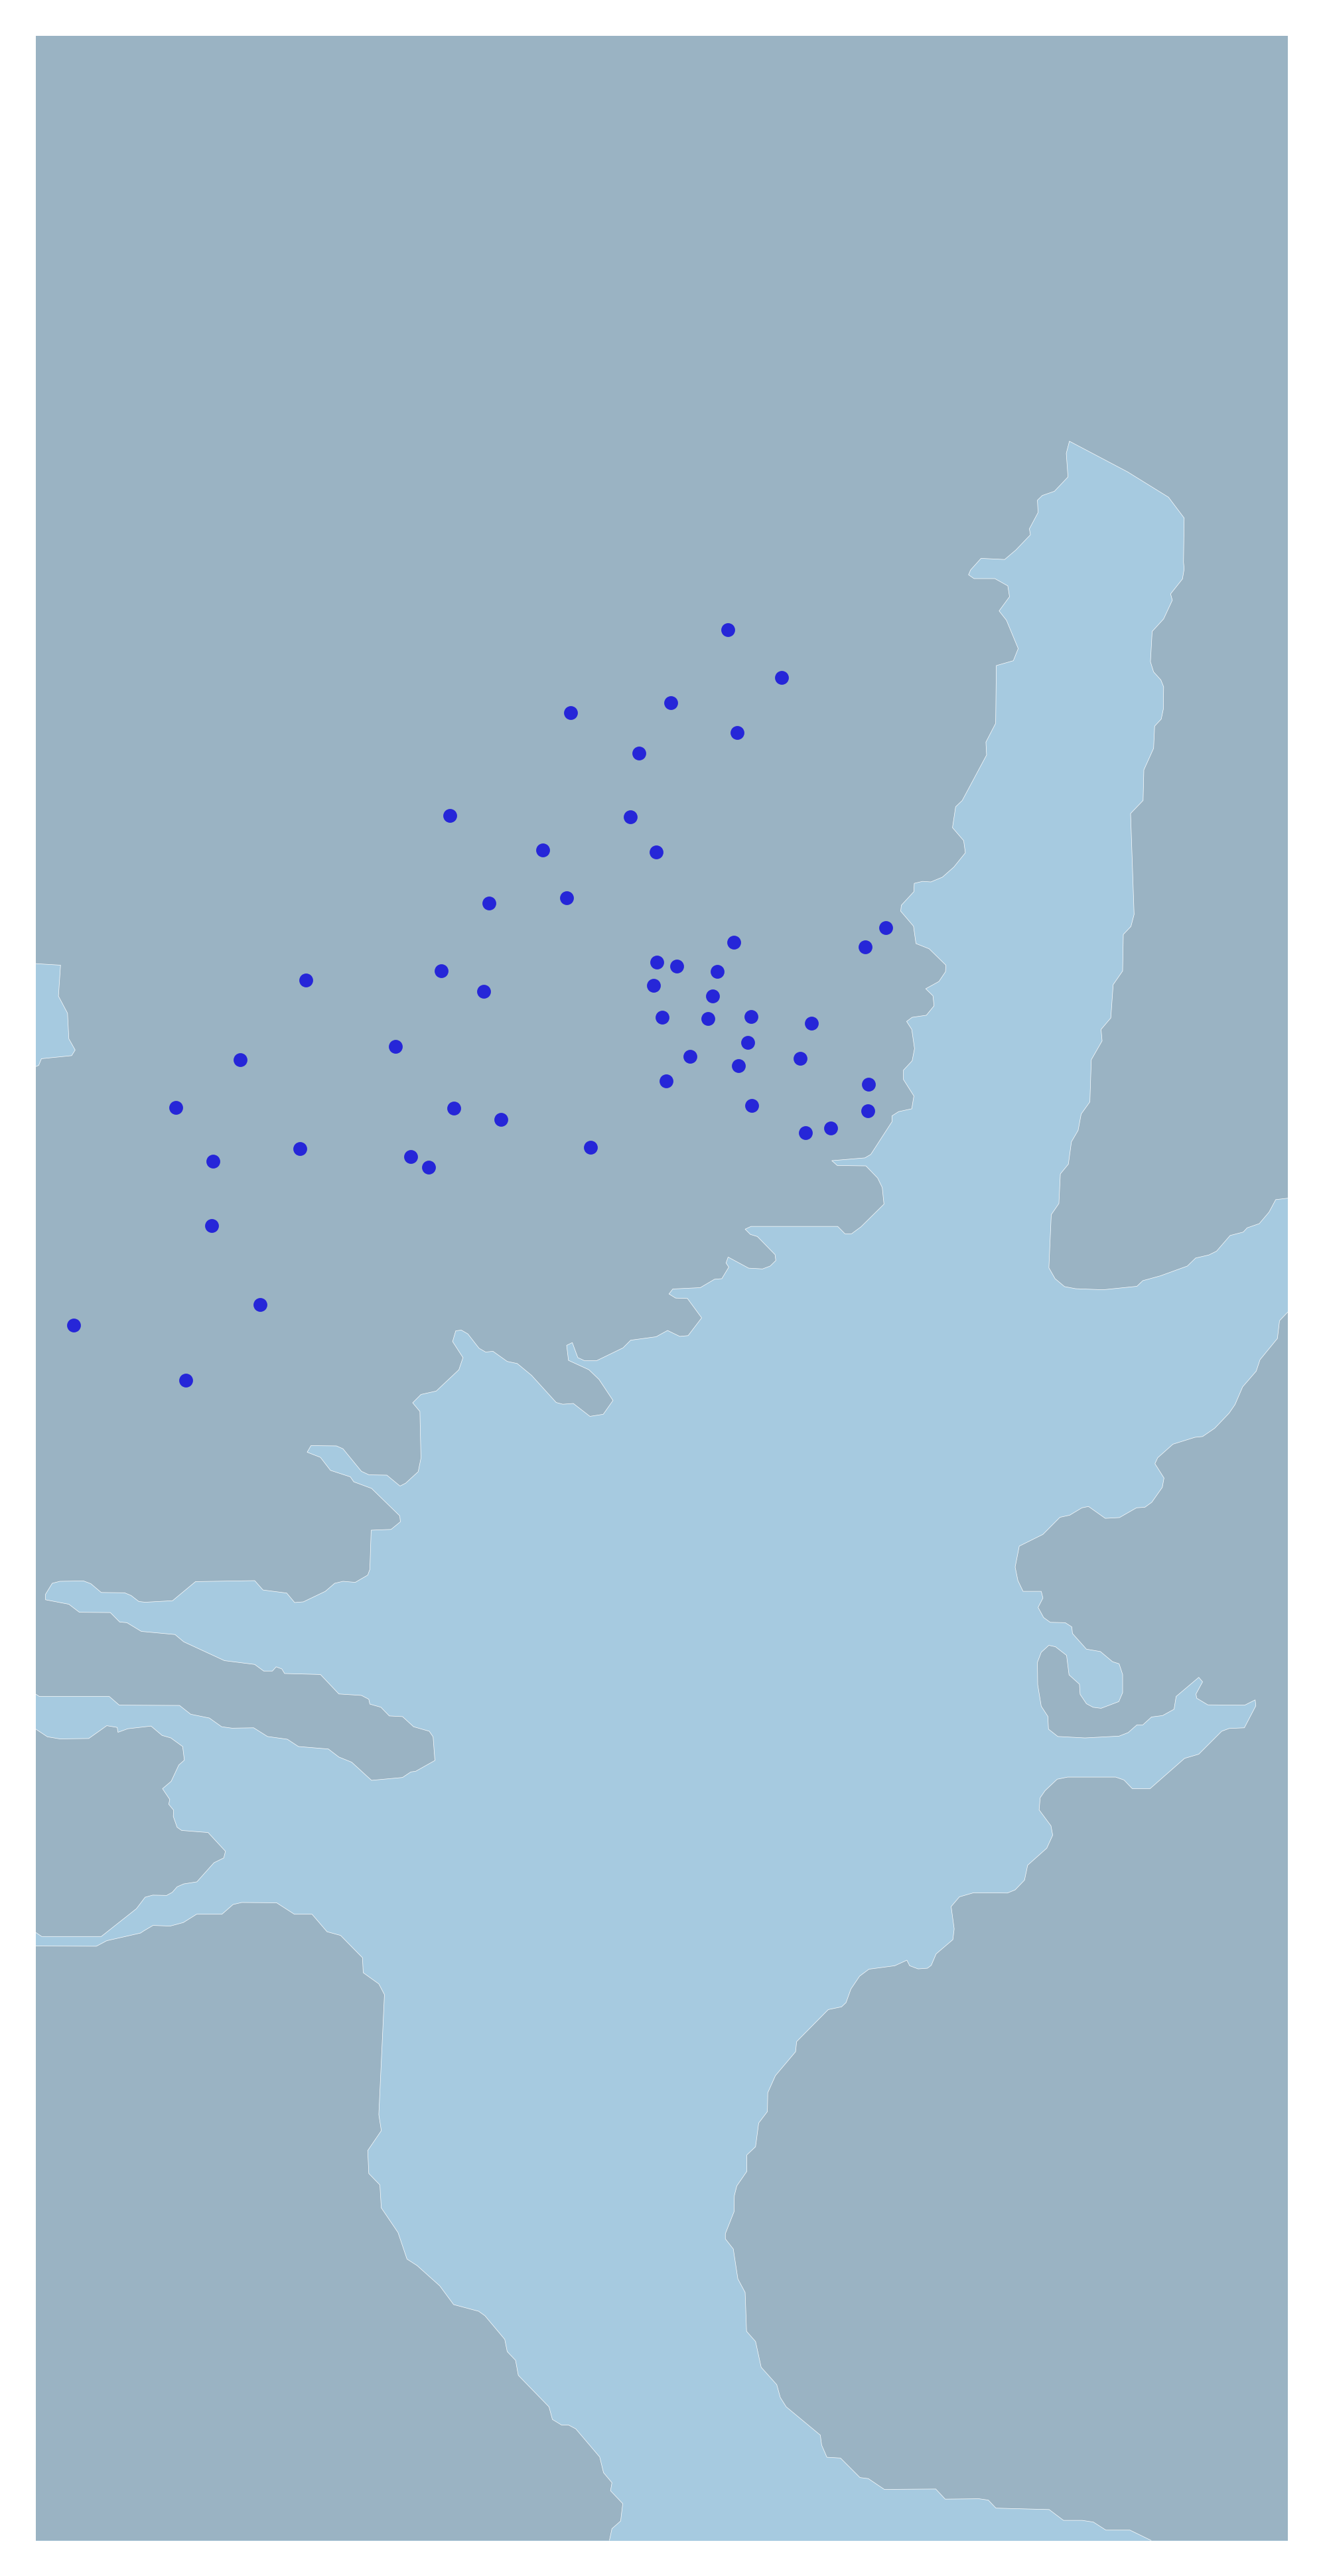

In [57]:
llon = -74.1
llat = 40.6
rlon = -74.0
rlat = 40.8

plt.figure(figsize=(10, 10), dpi=500)

m=Basemap(llcrnrlon=llon,llcrnrlat=llat,urcrnrlon=rlon,urcrnrlat=rlat,resolution='f')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

m.scatter(lat_lon['Start Station Longitude'],lat_lon['Start Station Latitude'],s=4,alpha=1,color='b')

## Introduce Weather Information

In [60]:
weather = pd.read_csv('./weather.csv')

In [62]:
weather['date'] = pd.to_datetime(weather['date'])

In [71]:
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2016-01-01,42,34,38.0,0.00,0.0,0
1,2016-02-01,40,32,36.0,0.00,0.0,0
2,2016-03-01,45,35,40.0,0.00,0.0,0
3,2016-04-01,36,14,25.0,0.00,0.0,0
4,2016-05-01,29,11,20.0,0.00,0.0,0


In [72]:
weather.rename(columns={'date':'day'}, inplace=True)

In [64]:
raw_data_train = pd.read_csv("train.csv")
raw_data_test = pd.read_csv("train.csv")
raw_data=pd.concat([raw_data_train,raw_data_test])
raw_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [65]:
raw_data['pickup_datetime'] = pd.to_datetime(raw_data['pickup_datetime'])

In [66]:
def add_day_and_hour():
    day = []
    hour = []
    for i in range(len(raw_data)):
        day.append(raw_data['pickup_datetime'].iloc[i].date())
        hour.append(raw_data['pickup_datetime'].iloc[i].hour)
    day_series = pd.Series(day)
    hour_series = pd.Series(hour)
    raw_data['day'] = day_series
    raw_data['hour'] = hour_series

In [67]:
add_day_and_hour()

In [69]:
raw_data['day'] = pd.to_datetime(raw_data['day'])

In [74]:
merge_data = pd.merge(raw_data,weather,on='day')

In [75]:
merge_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,hour,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,51,40,45.5,0.29,0.0,0
1,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,2016-03-14,14,51,40,45.5,0.29,0.0,0
2,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,2016-03-14,15,51,40,45.5,0.29,0.0,0
3,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,2016-03-14,4,51,40,45.5,0.29,0.0,0
4,id3817493,2,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,N,1050,2016-03-14,14,51,40,45.5,0.29,0.0,0


In [77]:
merge_data.to_csv("./data_with_weather.csv")